In [8]:
%run /home/analysis_user/New_trap_code/Tools/basic_packages.py

plt.rcParams["figure.figsize"] = (12,9)
plt.rcParams["font.size"] = 24
plt.rcParams['xtick.labelsize'] = "small"
plt.rcParams['ytick.labelsize'] = 36

from skimage import data
from skimage.registration import phase_cross_correlation
from skimage.registration._phase_cross_correlation import _upsampled_dft
from scipy.ndimage import fourier_shift

In [9]:
# load the files 
bead_date =20200713
bead_number = 1
dataset = "/Millicharge/WithSpin0714/"
FOI = "Discharge*"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset + "Pictures/"
filename = dirname + FOI


In [10]:
images =  load_npy_files(dirname+FOI,max_files=10)

/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_0.npy 0
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_1.npy 1
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_2.npy 2
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_3.npy 3
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_4.npy 4
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_5.npy 5
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_6.npy 6
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_7.npy 7
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_8.npy 8
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_9.npy 9


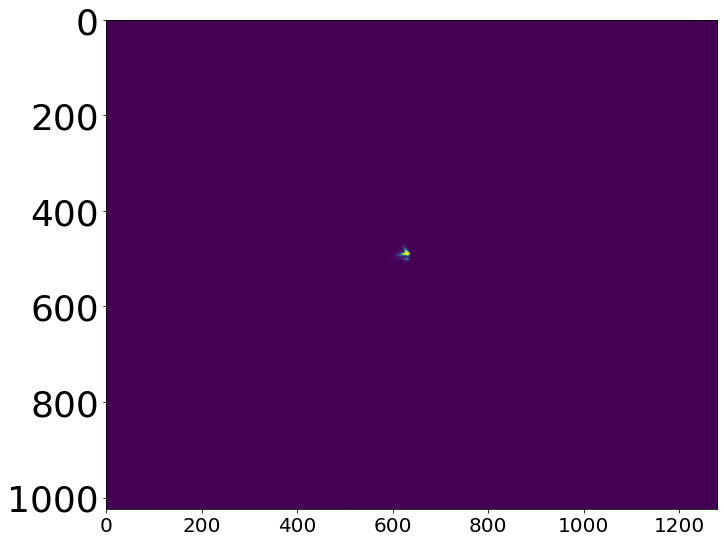

In [11]:
plt.imshow(images[0])

In [12]:
# make a set of offset images with random generation but store the true information
shift_list=[]
offset_images=[]

for i in tqdm(range(10)):
    image = images[0]
    shift = (1/1000*np.random.randn(),1/10*np.random.randn())
    shift_list.append(shift[0])
    offset_image = fourier_shift(np.fft.fftn(image), shift)
    offset_image = np.fft.ifftn(offset_image)
    offset_images.append(offset_image)

100%|██████████| 10/10 [00:01<00:00,  5.61it/s]


In [13]:
start = time.time()
shift_z = []
argmax = []
gaus_list = []
image = images[0]
g = gaussian_bead_pos_fit(image,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
for offset_image in offset_images:
    gfit = gaussian_bead_pos_fit(np.real(offset_image),axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
    gaus_list.append(g[1].values['mean']-gfit[1].values['mean'])
   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(np.real(offset_image),axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, offset_image,
                                                      upsample_factor=1000)
    shift_z.append(shift[0])
end = time.time()
print(end-start)

5.311702489852905


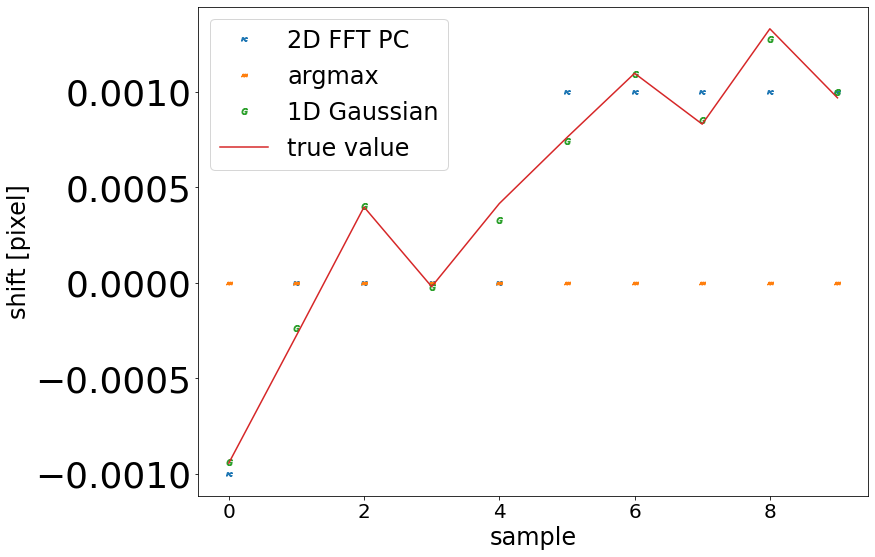

In [14]:
plt.plot(shift_z,linestyle="",marker="$PC$", label = "2D FFT PC")
plt.plot(argmax,linestyle="",marker="$AM$",label = "argmax")
plt.plot(gaus_list,linestyle="",marker="$G$",label ="1D Gaussian")

plt.plot(np.multiply(-1,shift_list),label="true value")
plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()

In [15]:
# now load an image series and see what happens

images_series =  load_npy_files(dirname+FOI,max_files=100)

/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_0.npy 0
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_1.npy 1
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_2.npy 2
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_3.npy 3
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_4.npy 4
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_5.npy 5
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_6.npy 6
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_7.npy 7
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_8.npy 8
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_9.npy 9
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_10.npy 10
/data/new_trap/20200713/Bead1//Millicharge/WithSpin0714/Pictures/Discharge_11.npy 11


In [16]:
start = time.time()
shift_z = []
argmax = []
gaus_list = []
image = images_series[0]
g = gaussian_bead_pos_fit(image,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
for images in images_series:
    gfit = gaussian_bead_pos_fit(images,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
    gaus_list.append(g[1].values['mean']-gfit[1].values['mean'])
   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(images,axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, images,
                                                      upsample_factor=1000)
    shift_z.append(shift[0])
end = time.time()
print(end-start)

57.837740421295166


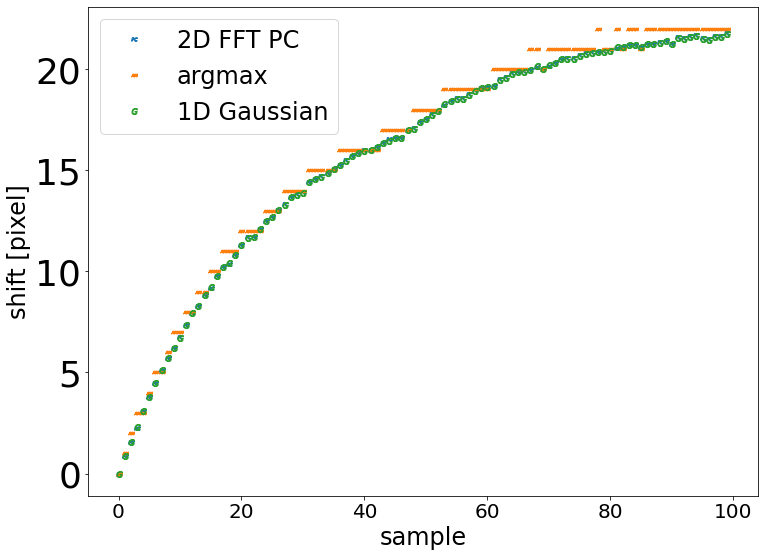

In [17]:
plt.plot(shift_z,linestyle="",marker="$PC$", label = "2D FFT PC")
plt.plot(argmax,linestyle="",marker="$AM$",label = "argmax")
plt.plot(gaus_list,linestyle="",marker="$G$",label ="1D Gaussian")

plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()


In [521]:
"/data/new_trap/20200614/Bead1/Shaking/NoAttractorNoShaking4"

'/data/new_trap/20200614/Bead1/Shaking/NoAttractorNoShaking4'

In [522]:
# load the files 
bead_date =20200614
bead_number = 1
dataset = "Shaking/"
FOI = "NoAttractorNoShaking4*"
dirname ="/data/new_trap/" + str(bead_date) + "/Bead%s/" %bead_number +dataset + "Pictures_0/"
filename = dirname + FOI


In [523]:
images_shadow =  load_npy_files(dirname+FOI,max_files=500)

/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_0.npy 0
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_1.npy 1
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_2.npy 2
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_3.npy 3
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_4.npy 4
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_5.npy 5
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_6.npy 6
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_7.npy 7
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_8.npy 8
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_9.npy 9
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_10.npy 10
/data/new_trap/20200614/Bead1/Shaking/Pictures_0/NoAttractorNoShaking4_11.npy 11
/data/new_trap/20200614/Bead1/Shaking/Pictures_0

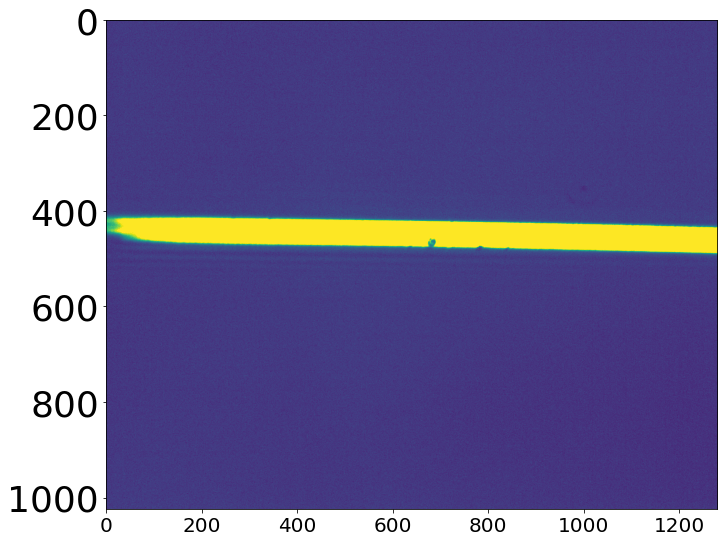

In [524]:
plt.imshow(images_shadow[0])

In [525]:
# make a set of offset images with random generation but store the true information
shift_list=[]
offset_images=[]

for i in tqdm(range(25)):
    image = images_shadow[0]
    shift = (0.01*np.random.randn(),0*np.random.randn())
    shift_list.append(shift[0])
    offset_image = fourier_shift(np.fft.fftn(image), shift)
    offset_image = np.fft.ifftn(offset_image)
    offset_images.append(offset_image)




  0%|          | 0/25 [00:00<?, ?it/s]


  4%|▍         | 1/25 [00:00<00:04,  5.64it/s]


  8%|▊         | 2/25 [00:00<00:04,  4.95it/s]


 12%|█▏        | 3/25 [00:00<00:04,  5.11it/s]


 16%|█▌        | 4/25 [00:00<00:04,  4.64it/s]


 20%|██        | 5/25 [00:01<00:04,  4.89it/s]


 24%|██▍       | 6/25 [00:01<00:04,  4.51it/s]


 28%|██▊       | 7/25 [00:01<00:04,  4.27it/s]


 32%|███▏      | 8/25 [00:01<00:03,  4.59it/s]


 36%|███▌      | 9/25 [00:02<00:03,  4.37it/s]


 40%|████      | 10/25 [00:02<00:03,  4.68it/s]


 44%|████▍     | 11/25 [00:02<00:03,  4.43it/s]


 48%|████▊     | 12/25 [00:02<00:02,  4.73it/s]


 52%|█████▏    | 13/25 [00:02<00:02,  4.47it/s]


 56%|█████▌    | 14/25 [00:03<00:02,  4.78it/s]


 60%|██████    | 15/25 [00:03<00:02,  4.51it/s]


 64%|██████▍   | 16/25 [00:03<00:01,  4.80it/s]


 68%|██████▊   | 17/25 [00:03<00:01,  4.53it/s]


 72%|███████▏  | 18/25 [00:03<00:01,  4.83it/s]


 76%|███████▌  | 19/25 [00:04<00:01,  4.56it/s]


 80%|████████  

In [526]:
start = time.time()
shift_z = []
argmax = []
gaus_list = []
image = images_shadow[0]
m0,_ = from_shadow_image_to_height(image,170,area_low_limits=[650,730],area_widths=[45,70],plot=False,flb=450)
for offset_image in offset_images:
    mean, m = from_shadow_image_to_height(np.real(offset_image),175,area_low_limits=[650,730],area_widths=[45,70],plot=False,flb=450)
    plt.show()
    gaus_list.append(np.subtract(mean,m0))   
    #argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(np.real(offset_image),axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, offset_image,
                                                      upsample_factor=1000)
    shift_z.append(shift[0])
end = time.time()
print(end-start)

14.876219034194946


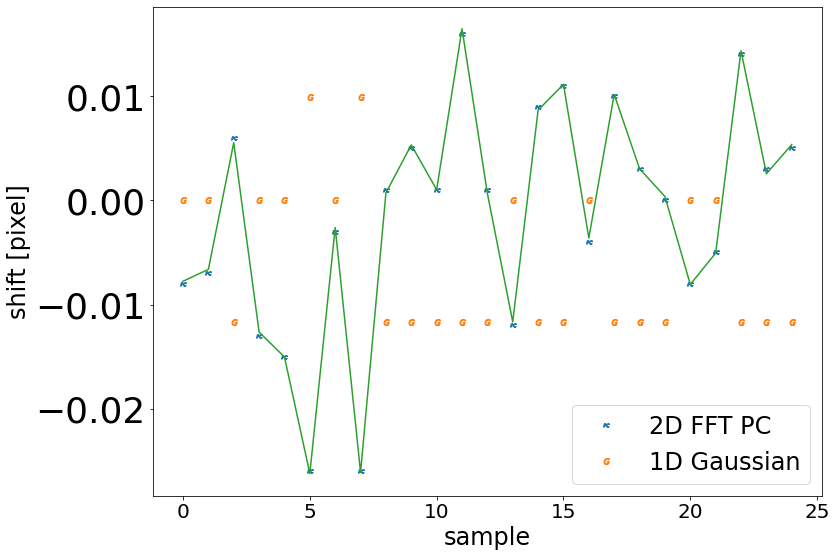

In [527]:
plt.plot(np.multiply(1,shift_z),linestyle="",marker="$PC$", label = "2D FFT PC")
plt.plot(np.multiply(-1,np.subtract(gaus_list,gaus_list[0])),linestyle="",marker="$G$",label ="1D Gaussian")
plt.plot(np.multiply(-1,shift_list))
#plt.plot(df_H.height_raw[0:100]-df_H.height_raw[0],linestyle="",marker="$H$")
plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()


In [528]:
df_H = np.load("/data/new_trap_processed/processed_files/20200614/Bead1/Shaking/NoAttractorNoShaking4_aux.pkl",allow_pickle=True)

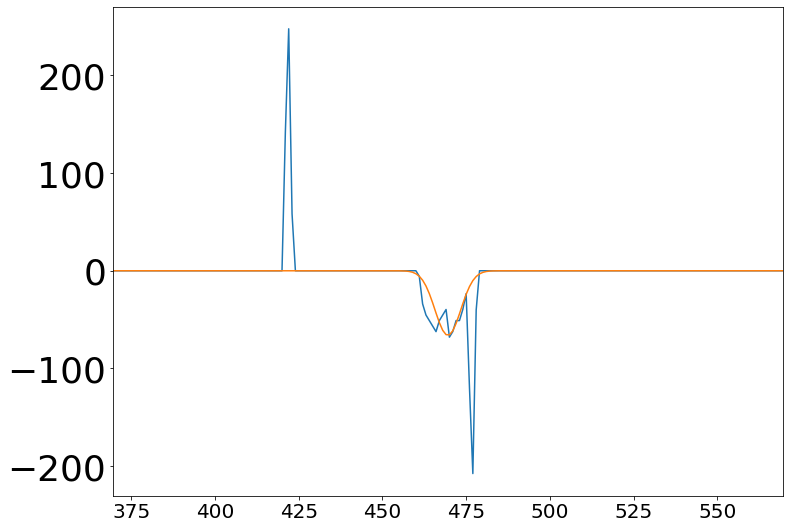

In [529]:
 mean2, m2 = from_shadow_image_to_height(images_shadow[0],170,area_low_limits=[650,730],area_widths=[45,70],plot=True,flb=450)


In [539]:
start = time.time()
shift_z = []
argmax = []
gaus_list = []
image = images_shadow[0]
g = gaussian_bead_pos_fit(image,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
for images in tqdm(images_shadow):
    gfit = gaussian_bead_pos_fit(images,axis=0,low_x_lim=500,up_x_lim=700,low_y_lim=420,up_y_lim=550,upper_area=1000,up_lim_width=12)
    mean, m = from_shadow_image_to_height(images,175,area_low_limits=[650,730],area_widths=[45,70],plot=False,flb=450)
    #plt.show()
    gaus_list.append(mean)
   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(images,axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, images,
                                                      upsample_factor=1000)
    shift_z.append(shift[0])
end = time.time()
print(end-start)




  0%|          | 0/500 [00:00<?, ?it/s]


  0%|          | 1/500 [00:00<04:19,  1.92it/s]


  0%|          | 2/500 [00:01<04:28,  1.85it/s]


  1%|          | 3/500 [00:01<04:36,  1.80it/s]


  1%|          | 4/500 [00:02<04:40,  1.77it/s]


  1%|          | 5/500 [00:02<04:42,  1.75it/s]


  1%|          | 6/500 [00:03<04:43,  1.74it/s]


  1%|▏         | 7/500 [00:04<04:46,  1.72it/s]


  2%|▏         | 8/500 [00:04<04:54,  1.67it/s]


  2%|▏         | 9/500 [00:05<05:02,  1.63it/s]


  2%|▏         | 10/500 [00:05<05:02,  1.62it/s]


  2%|▏         | 11/500 [00:06<04:59,  1.63it/s]


  2%|▏         | 12/500 [00:07<04:58,  1.64it/s]


  3%|▎         | 13/500 [00:07<04:57,  1.63it/s]


  3%|▎         | 14/500 [00:08<04:58,  1.63it/s]


  3%|▎         | 15/500 [00:09<04:54,  1.65it/s]


  3%|▎         | 16/500 [00:09<04:54,  1.64it/s]


  3%|▎         | 17/500 [00:10<04:55,  1.64it/s]


  4%|▎         | 18/500 [00:10<04:55,  1.63it/s]


  4%|▍         | 19/500 [00:11<04:56,  1.62it/

297.3399016857147


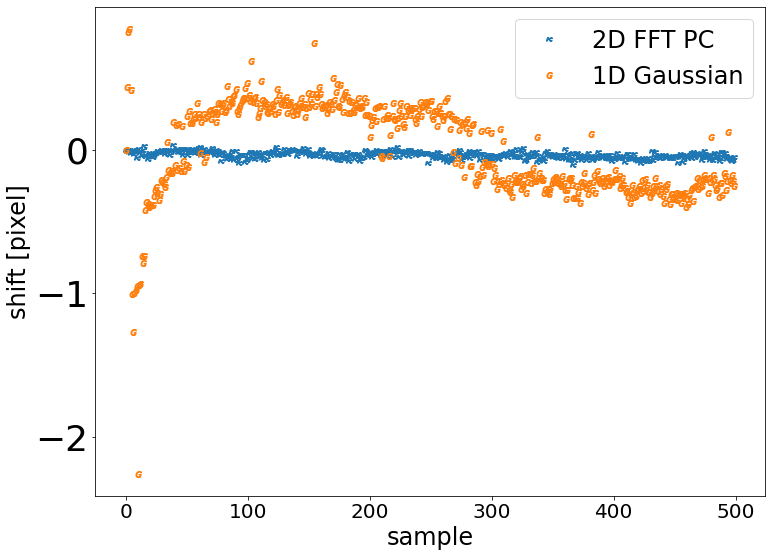

In [540]:
plt.plot(shift_z,linestyle="",marker="$PC$", label = "2D FFT PC")
plt.plot(np.subtract(gaus_list,gaus_list[0]),linestyle="",marker="$G$",label ="1D Gaussian")
#plt.plot(df_H.height_raw[0:500]-df_H.height_raw[0],linestyle="",marker="$H$")
plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()


In [371]:
side2_images = load_npy_files("/data/SC_data/ImageAnalysis/800fps/trial_1/frame_*.npy",max_files=10000)

/data/SC_data/ImageAnalysis/800fps/trial_1/frame_0.npy 0
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_1.npy 1
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_2.npy 2
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_3.npy 3
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_4.npy 4
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_5.npy 5
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_6.npy 6
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_7.npy 7
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_8.npy 8
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_9.npy 9
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_10.npy 10
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_11.npy 11
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_12.npy 12
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_13.npy 13
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_14.npy 14
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_15.npy 15
/data/SC_data/ImageAnalysis/800fps/trial_1/frame_16.npy 16
/data/SC_data/Ima

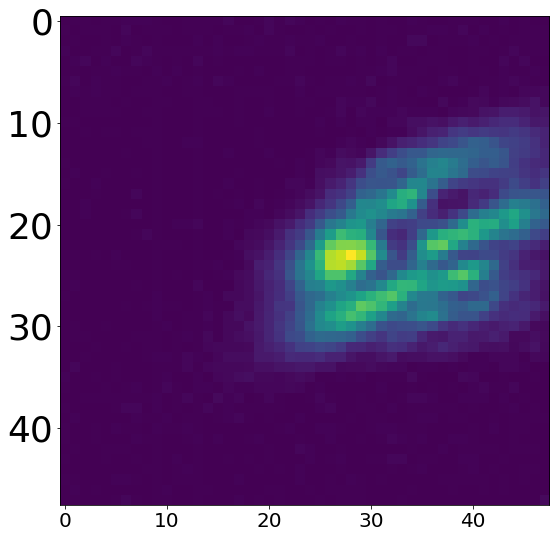

In [541]:
plt.imshow(side2_images[0])

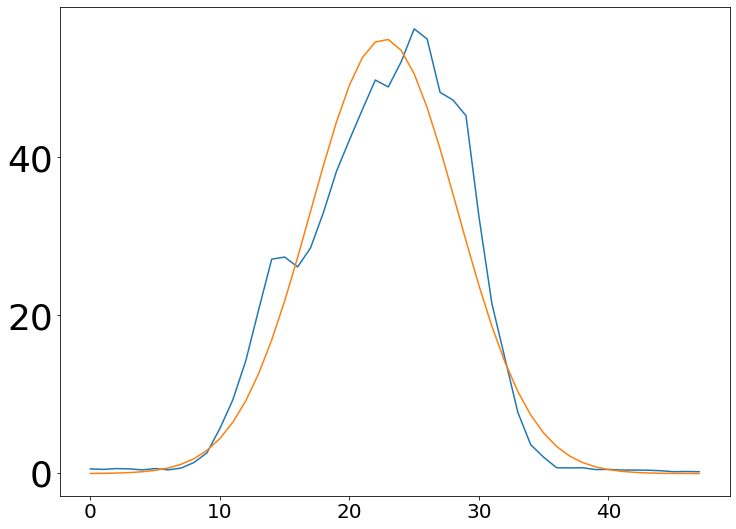

In [367]:
x = np.arange(0,48,1)
plt.plot(np.mean(side2_images[14],axis=1))
plt.plot(x,gaussian(x,params=[gfit[1].values["area"],gfit[1].values["mean"],gfit[1].values["sigma"],gfit[1].values["constant"]]))

In [ ]:
start = time.time()
shift_z2 = []
argmax = []
gaus_list = []
image = side2_images[0]
g = gfit = gaussian_bead_pos_fit(side2_images[0],axis=0,low_x_lim=0,up_x_lim=48,low_y_lim=0,up_y_lim=48,upper_area=1000,up_lim_width=12,img_height=48,img_width=48)
for side2_image in tqdm(side2_images):
    gfit = gaussian_bead_pos_fit(side2_image,axis=0,low_x_lim=0,up_x_lim=48,low_y_lim=0,up_y_lim=48,upper_area=1000,up_lim_width=12,img_height=48,img_width=48)
    gaus_list.append(g[1].values['mean']-gfit[1].values['mean'])
   # print(f"Detected pixel offset (y, x): {shift}")
    argmax.append(np.argmax(np.mean(image,axis=1))-np.argmax(np.mean(np.real(side2_image),axis=1)))
    # subpixel precision
    shift, error, diffphase = phase_cross_correlation(image, side2_image,
                                                      upsample_factor=1000)
    shift_z2.append(shift[0])
end = time.time()
print(end-start)




  0%|          | 0/8000 [00:00<?, ?it/s]


  0%|          | 1/8000 [00:00<13:58,  9.55it/s]


  0%|          | 2/8000 [00:00<14:12,  9.38it/s]


  0%|          | 3/8000 [00:00<14:23,  9.27it/s]


  0%|          | 4/8000 [00:00<14:35,  9.13it/s]


  0%|          | 5/8000 [00:00<14:43,  9.05it/s]


  0%|          | 6/8000 [00:00<15:01,  8.87it/s]


  0%|          | 7/8000 [00:00<15:07,  8.81it/s]


  0%|          | 8/8000 [00:00<15:15,  8.73it/s]


  0%|          | 9/8000 [00:01<15:21,  8.67it/s]


  0%|          | 10/8000 [00:01<15:35,  8.54it/s]


  0%|          | 11/8000 [00:01<15:30,  8.59it/s]


  0%|          | 12/8000 [00:01<15:24,  8.64it/s]


  0%|          | 13/8000 [00:01<15:23,  8.65it/s]


  0%|          | 14/8000 [00:01<15:24,  8.64it/s]


  0%|          | 15/8000 [00:01<15:43,  8.47it/s]


  0%|          | 16/8000 [00:01<15:29,  8.59it/s]


  0%|          | 17/8000 [00:01<15:32,  8.56it/s]


  0%|          | 18/8000 [00:02<15:32,  8.56it/s]


  0%|          | 19/8000 [0

In [ ]:
plt.plot(shift_z,linestyle="",marker="$PC$", label = "2D FFT PC")
#plt.plot(shift_z2,linestyle="",marker="$PC$", label = "2D FFT PC 2")
#plt.plot(argmax,linestyle="",marker="$AM$",label = "argmax")
plt.plot(gaus_list,linestyle="",marker="$G$",label ="1D Gaussian")
plt.xlim(0,100)
plt.ylabel("shift [pixel]")
plt.xlabel("sample")
plt.legend()
plt.show()

In [387]:
fft1 = np.fft.rfft(shift_z)
fft = (fft1 * fft1.conj()).real

In [392]:
fft2 = np.fft.rfft(gaus_list)
fft_g = (fft2 * fft2.conj()).real

In [ ]:
fft3 = np.fft.rfft(shift_z2)
fft_2 = (fft2 * fft2.conj()).real

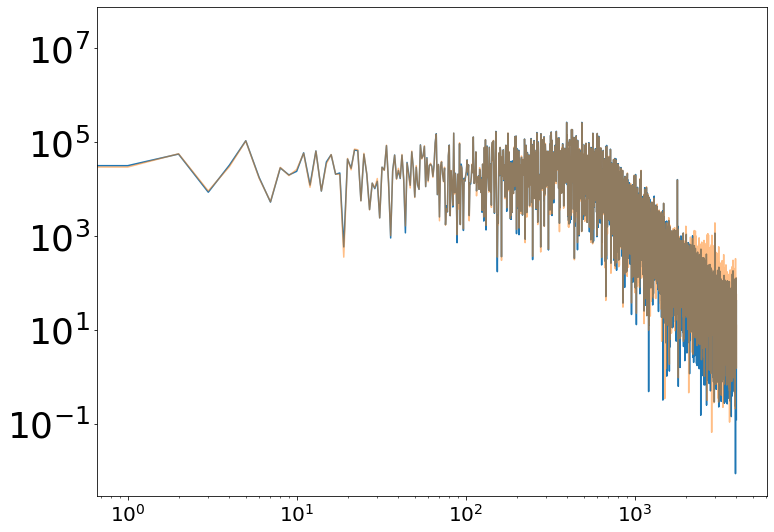

In [403]:
plt.loglog(fft)
plt.loglog(fft_g,alpha=0.5)

In [419]:
fname = "/data/new_trap/20200812/Bead1/InitialTest/Data0.h5"
BDF = BeadDataFile.BeadDataFile(fname)


No height data
No electrodes data
No cantilever data
No laser power data


In [1]:
fft4= np.fft.rfft(BDF.xyz[2])
fft_qpd = (fft4* fft4.conj()).real


NameError: name 'np' is not defined

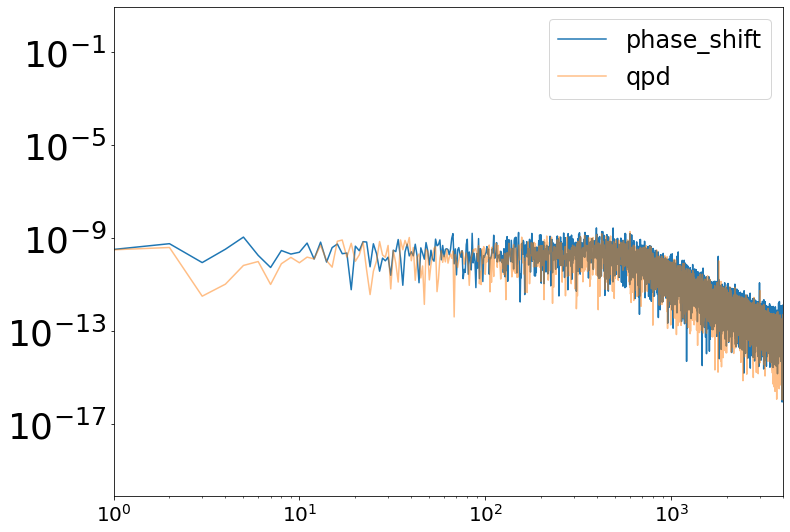

In [483]:
plt.loglog(fft/fft.sum()*5e-7, label = "phase_shift")
#plt.loglog(fft_g/fft_g.sum()*5e-7,alpha=0.5, label = "gaus")
plt.loglog(fft_qpd/fft_qpd.sum(),alpha=0.5, label = "qpd")
plt.xlim(1,4000)
plt.legend()
plt.show()

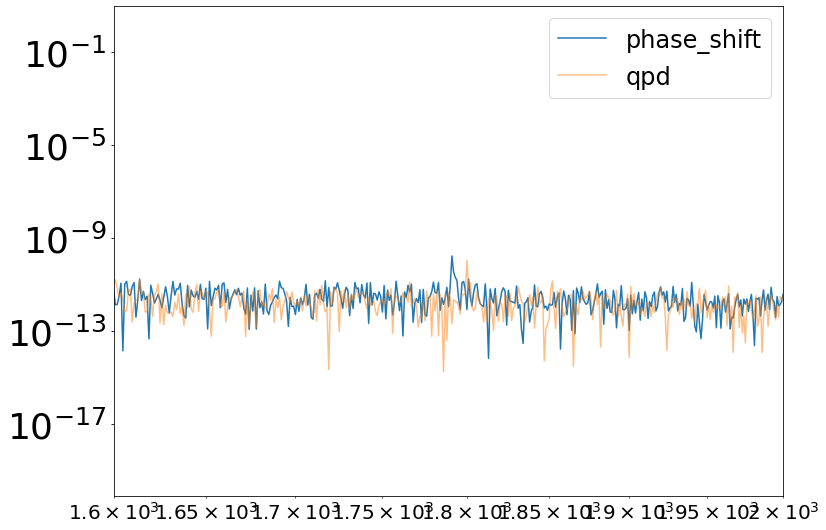

In [462]:
plt.loglog(fft/fft.sum()*5e-7, label = "phase_shift")
#plt.loglog(fft_g/fft_g.sum()*5e-7,alpha=0.5, label = "gaus")
plt.loglog(fft_qpd/fft_qpd.sum(),alpha=0.5, label = "qpd")
plt.xlim(1600,2000)
plt.legend()
plt.show()